In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
try:
    df = pd.read_csv('/content/jak2train.csv')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    print("Attempting to skip problematic line and continue reading the data...")
    df = pd.read_csv('/content/jak2train.csv', error_bad_lines=False)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Columns: 1615 entries, name to mZagreb2
dtypes: float64(1461), int64(153), object(1)
memory usage: 4.9+ MB


In [67]:
df.shape

(395, 1615)

In [68]:
df.head()

,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C1=CC=C(C=C1)C(=O)OC2=CC=CC3=C2C=CC=C3O,1,NaN,NaN,0,0,26.533788,2.417568,4.835136,26.533788,...,9.904237,53.680768,264.078644,8.252458,816.0,31.0,104.0,122.0,5.666667,4.444444
1,CCCN1C(=NC2=C1C(=O)N(C(=O)N2C)C)CN(C)CC3=CC=CC=C3,1,NaN,NaN,0,1,33.119478,2.547941,4.982317,33.119478,...,10.256501,75.463984,355.200825,6.964722,1663.0,44.0,136.0,163.0,9.611111,5.805556
2,C1=CC=C(C=C1)CCCNC(=O)/C(=C/C2=CC(=C(C=C2)O)O)...,1,NaN,NaN,0,0,30.775285,2.306470,4.612940,30.775285,...,9.722625,57.631782,322.131742,7.669803,1632.0,32.0,114.0,127.0,8.166667,5.555556
3,C1=CC=C(C=C1)CCCNC(=O)/C(=C/C2=CC(=C(C=C2)O)O)...,1,NaN,NaN,0,0,30.775285,2.306470,4.612940,30.775285,...,9.722625,57.631782,322.131742,7.669803,1632.0,32.0,114.0,127.0,8.166667,5.555556
4,C1CCC2(CC1)N=C3C=C(C=CC3=[N+]2[O-])NC4=CC=CC=C4,1,NaN,NaN,0,0,29.437477,2.545352,4.897891,29.437477,...,10.187199,71.277759,293.152812,7.150069,1074.0,36.0,122.0,147.0,5.368056,4.763889


In [69]:
df.tail()

,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
390,C1CCC(CC1)NCCC2=NC3=CC=CC=C3N2,1,NaN,NaN,0,1,24.166712,2.380904,4.574431,24.166712,...,9.561068,64.611428,243.173548,6.235219,7.040000e+02,22.0,92.0,105.0,3.944444,4.027778
391,C1CCN(C1)C2=NC(=NC3=CC=CC=C32)NC4=CC=C(C=C4)O.Cl,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,10.061474,71.644855,342.124739,7.956389,2.300001e+09,34.0,124.0,146.0,NaN,5.000000
392,CCN(C1CCCCC1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC...,1,NaN,NaN,0,0,36.999976,2.454824,4.909648,36.999976,...,10.319002,64.607539,437.144298,7.806148,2.472000e+03,47.0,150.0,175.0,9.930556,6.402778
393,CC1=CC(=NO1)NC(=O)CCC(=O)N(CCOC)CC(=O)NCC2CCCO2,1,NaN,NaN,0,0,35.151928,2.274525,4.513840,35.151928,...,9.708020,77.399853,396.200885,7.075016,2.465000e+03,32.0,132.0,145.0,9.777778,6.444444
394,CC1=NC2=NC=NN2C(=C1)N3CCN(CC3)C4=NC5=CC=CC=C5S4,1,NaN,NaN,0,0,34.017635,2.468444,4.872741,34.017635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.isnull().sum()

name          0
cls           0
ABC         395
ABCGG       395
nAcid         0
           ... 
WPol          1
Zagreb1       1
Zagreb2       1
mZagreb1     17
mZagreb2      1
Length: 1615, dtype: int64

In [71]:
zero_columns = df.columns[(df == 0).all()]
zero_columns

Index(['nB', 'nP', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB',
       'NsNH3', 'NssNH2', 'NsssNH', 'NssssN', 'NsSiH3', 'NssSiH2', 'NsssSiH',
       'NssssSi', 'NsPH2', 'NssPH', 'NsssP', 'NdsssP', 'NsssssP', 'NsSH',
       'NsGeH3', 'NssGeH2', 'NsssGeH', 'NssssGe', 'NsAsH2', 'NssAsH', 'NsssAs',
       'NsssdAs', 'NsssssAs', 'NsSeH', 'NdSe', 'NssSe', 'NaaSe', 'NdssSe',
       'NddssSe', 'NsSnH3', 'NssSnH2', 'NsssSnH', 'NssssSn', 'NsPbH3',
       'NssPbH2', 'NsssPbH', 'NssssPb', 'SsLi', 'SssBe', 'SssssBe', 'SssBH',
       'SsssB', 'SssssB', 'SsNH3', 'SssNH2', 'SsssNH', 'SssssN', 'SsSiH3',
       'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH'],
      dtype='object')

In [72]:
if not zero_columns.empty:
    # Display the zero columns
    print(df[zero_columns])
else:
    print("There are no columns where all entries are 0.")

     nB  nP  NsLi  NssBe  NssssBe  NssBH  NsssB  NssssB  NsNH3  NssNH2  ...  \
0     0   0     0      0        0      0      0       0      0       0  ...   
1     0   0     0      0        0      0      0       0      0       0  ...   
2     0   0     0      0        0      0      0       0      0       0  ...   
3     0   0     0      0        0      0      0       0      0       0  ...   
4     0   0     0      0        0      0      0       0      0       0  ...   
..   ..  ..   ...    ...      ...    ...    ...     ...    ...     ...  ...   
390   0   0     0      0        0      0      0       0      0       0  ...   
391   0   0     0      0        0      0      0       0      0       0  ...   
392   0   0     0      0        0      0      0       0      0       0  ...   
393   0   0     0      0        0      0      0       0      0       0  ...   
394   0   0     0      0        0      0      0       0      0       0  ...   

     SsNH3  SssNH2  SsssNH  SssssN  SsSiH3  SssSiH2

In [73]:
df=df.drop(columns=zero_columns)
df

,name,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C1=CC=C(C=C1)C(=O)OC2=CC=CC3=C2C=CC=C3O,1,NaN,NaN,0,0,26.533788,2.417568,4.835136,26.533788,...,9.904237,53.680768,264.078644,8.252458,8.160000e+02,31.0,104.0,122.0,5.666667,4.444444
1,CCCN1C(=NC2=C1C(=O)N(C(=O)N2C)C)CN(C)CC3=CC=CC=C3,1,NaN,NaN,0,1,33.119478,2.547941,4.982317,33.119478,...,10.256501,75.463984,355.200825,6.964722,1.663000e+03,44.0,136.0,163.0,9.611111,5.805556
2,C1=CC=C(C=C1)CCCNC(=O)/C(=C/C2=CC(=C(C=C2)O)O)...,1,NaN,NaN,0,0,30.775285,2.306470,4.612940,30.775285,...,9.722625,57.631782,322.131742,7.669803,1.632000e+03,32.0,114.0,127.0,8.166667,5.555556
3,C1=CC=C(C=C1)CCCNC(=O)/C(=C/C2=CC(=C(C=C2)O)O)...,1,NaN,NaN,0,0,30.775285,2.306470,4.612940,30.775285,...,9.722625,57.631782,322.131742,7.669803,1.632000e+03,32.0,114.0,127.0,8.166667,5.555556
4,C1CCC2(CC1)N=C3C=C(C=CC3=[N+]2[O-])NC4=CC=CC=C4,1,NaN,NaN,0,0,29.437477,2.545352,4.897891,29.437477,...,10.187199,71.277759,293.152812,7.150069,1.074000e+03,36.0,122.0,147.0,5.368056,4.763889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,C1CCC(CC1)NCCC2=NC3=CC=CC=C3N2,1,NaN,NaN,0,1,24.166712,2.380904,4.574431,24.166712,...,9.561068,64.611428,243.173548,6.235219,7.040000e+02,22.0,92.0,105.0,3.944444,4.027778
391,C1CCN(C1)C2=NC(=NC3=CC=CC=C32)NC4=CC=C(C=C4)O.Cl,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,...,10.061474,71.644855,342.124739,7.956389,2.300001e+09,34.0,124.0,146.0,NaN,5.000000
392,CCN(C1CCCCC1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC...,1,NaN,NaN,0,0,36.999976,2.454824,4.909648,36.999976,...,10.319002,64.607539,437.144298,7.806148,2.472000e+03,47.0,150.0,175.0,9.930556,6.402778
393,CC1=CC(=NO1)NC(=O)CCC(=O)N(CCOC)CC(=O)NCC2CCCO2,1,NaN,NaN,0,0,35.151928,2.274525,4.513840,35.151928,...,9.708020,77.399853,396.200885,7.075016,2.465000e+03,32.0,132.0,145.0,9.777778,6.444444


In [74]:
list(df)

['name',
 'cls',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpMax_A',
 'SpDiam_A',
 'SpAD_A',
 'SpMAD_A',
 'LogEE_A',
 'VE1_A',
 'VE2_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'VR3_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nSpiro',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nBr',
 'nI',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 

In [75]:
df.describe()

,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
count,395.0,0.0,0.0,395.000000,395.000000,377.000000,377.000000,377.000000,377.000000,377.000000,...,394.000000,394.000000,394.000000,394.000000,3.940000e+02,394.000000,394.00000,394.000000,378.000000,394.000000
mean,1.0,NaN,NaN,0.060759,0.098734,29.828457,2.422494,4.809691,29.828457,1.278914,...,9.978062,63.060058,335.409761,8.470359,1.248745e+08,35.659898,119.42132,139.451777,7.878435,5.175056
std,0.0,NaN,NaN,0.320777,0.418934,5.987623,0.088557,0.159140,5.987623,0.040076,...,0.326627,9.878866,60.500772,1.473437,6.893523e+08,9.790220,26.04850,33.205413,1.679514,0.975508
min,1.0,NaN,NaN,0.000000,0.000000,13.362599,2.151538,4.303076,13.362599,1.113550,...,8.669571,41.136076,186.042927,6.235219,2.260000e+02,13.000000,50.00000,52.000000,3.944444,2.805556
25%,1.0,NaN,NaN,0.000000,0.000000,25.895010,2.355984,4.701680,25.895010,1.254805,...,9.793067,55.934672,292.024088,7.555678,9.245000e+02,30.000000,104.00000,118.000000,6.777778,4.444444
50%,1.0,NaN,NaN,0.000000,0.000000,29.426306,2.434852,4.831602,29.426306,1.279405,...,10.029195,60.004841,327.102606,8.059692,1.235500e+03,35.000000,119.00000,140.500000,7.638889,5.055556
75%,1.0,NaN,NaN,0.000000,0.000000,32.872331,2.464168,4.927444,32.872331,1.304859,...,10.167581,71.277759,371.052091,9.050051,1.818500e+03,41.000000,130.00000,156.750000,8.638889,5.682292
max,1.0,NaN,NaN,2.000000,5.000000,54.580769,2.749314,5.498628,54.580769,1.369238,...,11.098394,90.994467,545.231457,15.596979,9.000000e+09,85.000000,220.00000,290.000000,13.256944,9.361111


In [76]:
X = df[['nAtom', 'nHeavyAtom', 'nSpiro', 'nBridgehead', 'nHetero', 'nC', 'nN', 'nH','nO','nS','nF','nCl','nBr','nI','nX',]]
y = df['nAcid']


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [80]:
y_pred = svm_classifier.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9367088607594937


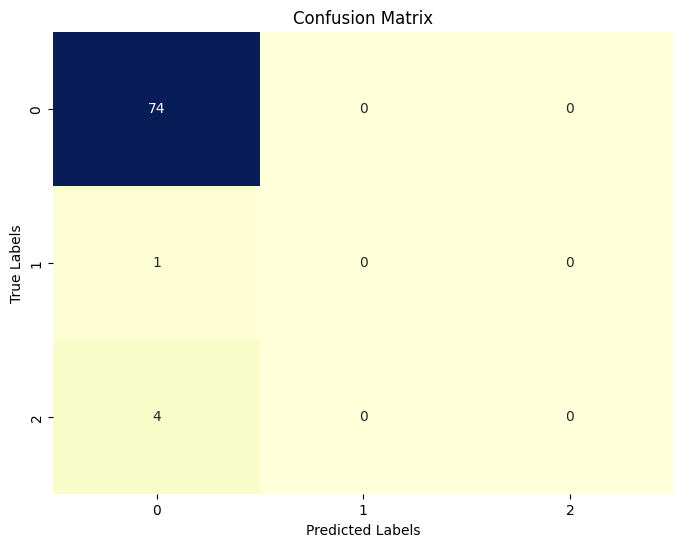

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()